<a href="https://colab.research.google.com/github/ShinUkhang/AI/blob/main/%ED%95%99%EC%83%9D%EC%97%B0%EA%B5%AC%EB%B3%B4%EA%B3%A0%EC%84%9C_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**분류할 데이터를 불러옵니다.**

**(# 표시는 주석으로 컴퓨터가 코드로 생각하지 않습니다.)**

In [1]:
#구글 코랩의 files라는 모듈을 불러옵니다. 
from google.colab import files 
uploaded=files.upload()

Saving project.csv to project.csv


판다스(표,테이블을 다루는 파이썬)으로 파일을 불러옵니다.

파일이름을 정확하게 입력해야 오류가 없습니다. 

In [2]:
import pandas as pd
data=pd.read_csv('project.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) 

In [3]:
data.head()

,id,temp,area,cabbage,carrot,apple,count
0,1,35,713,1,0,0,36
1,2,35,713,0,1,0,38
2,3,35,713,0,0,1,35
3,4,35,713,0,0,0,35
4,5,30,713,1,0,0,39


# **평균, 표준편차, 최솟값,최댓값, 사분위수를 확인합니다.**

In [4]:
data.describe()

,id,temp,area,cabbage,carrot,apple,count
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,31.687500,331.250000,0.229167,0.229167,0.229167,32.625000
std,14.00,5.141224,222.735842,0.424744,0.424744,0.424744,3.406033
min,1.00,25.000000,204.000000,0.000000,0.000000,0.000000,26.000000
25%,12.75,25.000000,204.000000,0.000000,0.000000,0.000000,30.000000
50%,24.50,30.000000,204.000000,0.000000,0.000000,0.000000,32.500000
75%,36.25,35.000000,331.250000,0.000000,0.000000,0.000000,35.000000
max,48.00,39.000000,713.000000,1.000000,1.000000,1.000000,41.000000


# **데이터의 형태와 갯수를 확인합니다.**
(float64는 실수라는 뜻입니다.)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       48 non-null     int64
 1   temp     48 non-null     int64
 2   area     48 non-null     int64
 3   cabbage  48 non-null     int64
 4   carrot   48 non-null     int64
 5   apple    48 non-null     int64
 6   count    48 non-null     int64
dtypes: int64(7)
memory usage: 2.8 KB


# **데이터를 히스토그램으로 시각화했습니다.**

확률과통계 시간에 배운 정규분포곡선을 나타내는 자료는 무엇인지 확인해봅시다. **(히스토그램이 나타내는 넓이는 모두 1 입니다.)**

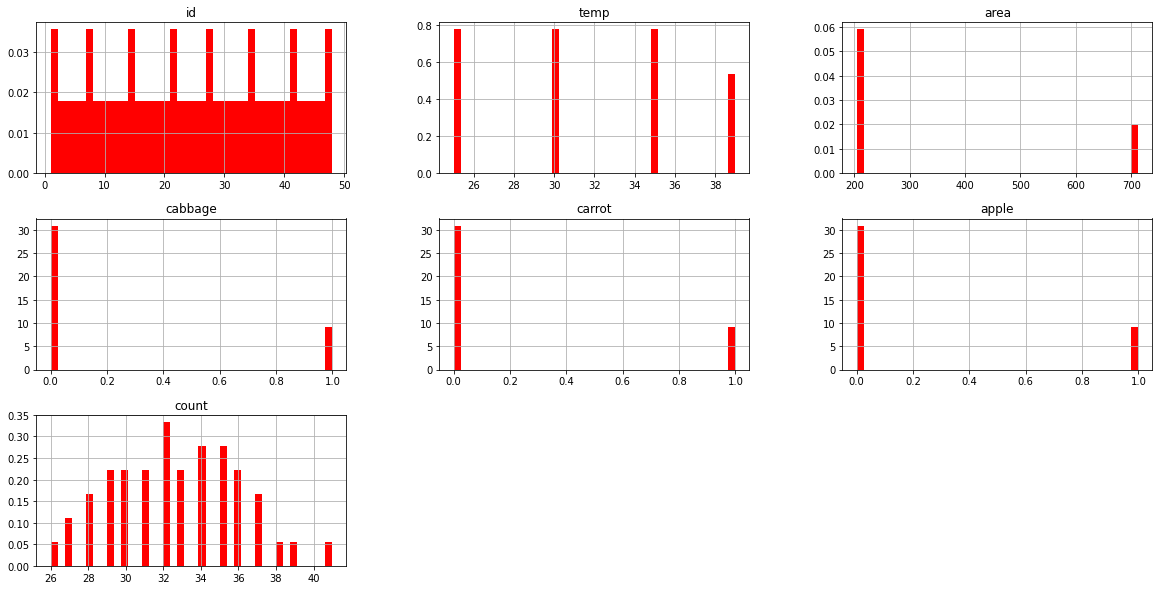

In [6]:
#맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다.
#hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기, color는 색상입니다.
import matplotlib.pyplot as plt  
data.hist(bins=40, density=True, color='red',figsize=(20,10)) 
plt.show()

# **데이터 간의 상관계수를 확인합니다.**

(결정계수도 있지만 최대한 코드를 간단하게 하고자 합니다.)

In [7]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['count']

id        -0.314568
temp      -0.236475
area       0.435392
cabbage    0.104788
carrot     0.295979
apple     -0.086404
count      1.000000
Name: count, dtype: float64

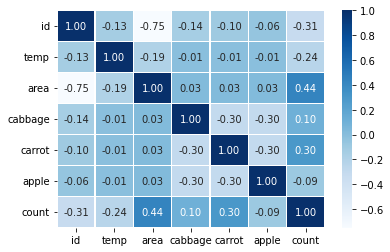

In [8]:
import seaborn as sb
sb.heatmap(data = data.corr(), fmt = '.2f',annot=True, linewidths=.5, cmap='Blues')

# **데이터의 결측치를 제거합니다.**

결측치는 빈칸입니다. 빈칸을 처리하는 방법은 0, 평균, 앞의수, 뒤의수 등 다양하게 채우는 방법이 있지만 , 여기서는 빈칸이 있는 행은 모두 삭제하겠습니다.

In [11]:
data.head()

,id,temp,area,cabbage,carrot,apple,count
0,1,35,713,1,0,0,36
1,2,35,713,0,1,0,38
2,3,35,713,0,0,1,35
3,4,35,713,0,0,0,35
4,5,30,713,1,0,0,39


In [12]:
data=data.dropna()

In [13]:
data.columns

Index(['id', 'temp', 'area', 'cabbage', 'carrot', 'apple', 'count'], dtype='object')

# **데이터를 선택해보았습니다.**

In [75]:
x=data[['temp', 'area', 'cabbage', 'carrot', 'apple']]
y=data['count']

# **데이터를 분할해보겠습니다.**

전체데이터를 훈련데이터와 테스트데이터 2개로 나눕니다. 

In [15]:
from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

# **데이터의 행태를 확인합니다.**

위에서 선택한 4개의 성분을 묶어서 벡터(1차원 텐서)가 됩니다.

이러한 벡터가 929개를 모아서 모델을 훈련합니다.

나머지 벡터 399개는 나중에 모델을 테스트하는 것에 쓰입니다.

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33, 5)
(33,)
(15, 5)
(15,)


# **데이터를 확률과통계시간에 배운 표준화해보겠습니다.** 

$$y={{x-m}\over{\sigma}}$$

표준화 전 후의 정확도는 차이가 있는 것을 확인할 수 있습니다. 

In [17]:
#각 성분별로 평균을 구해줍니다. 
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)

In [18]:
print(mean)
print(std)

temp        32.787879
area       327.393939
cabbage      0.181818
carrot       0.242424
apple        0.272727
dtype: float64
temp         4.973414
area       221.513817
cabbage      0.391675
carrot       0.435194
apple        0.452267
dtype: float64


# **데이터를 모두 표준화시켜줍니다.**

In [19]:
x_train-=mean
x_train/=std
x_test-=mean
x_test/=std

# **인공신경망 모델을 만들고자 합니다.**

In [76]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(7, input_dim=5,activation='relu')) 
model.add(Dense(1)) #출력층, 예측값 1개
opt=keras.optimizers.SGD(learning_rate=0.001) #확률적 경사하강법, 학습률 확인
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

# **모델을 실행합니다.** 

epoch는 반복횟수이고, batch_size는 훈련데이터 단위입니다.

예를 들면 100개의 데이터에서 epoch=5, batch_size=10이면
100개를 10개씩 묶어주고 묶음마다 1개만 훈련합니다.
이러한 방법으로 5회 반복합니다.

그리고 시간을 확인하면서 배치사이즈와 에포크에 따라 비교합시다. 

In [77]:
import time
a=time.time()
hist = model.fit(x_train, y_train, shuffle=True, epochs=30, batch_size=1)
b=time.time()
print(b-a)

Epoch 1/30
33/33 [==============================] - 0s 1ms/step - loss: 865.6724 - mae: 28.9164
Epoch 2/30
33/33 [==============================] - 0s 1ms/step - loss: 182.6695 - mae: 11.7688
Epoch 3/30
33/33 [==============================] - 0s 1ms/step - loss: 14.7895 - mae: 3.1938
Epoch 4/30
33/33 [==============================] - 0s 1ms/step - loss: 10.7875 - mae: 2.7390
Epoch 5/30
33/33 [==============================] - 0s 2ms/step - loss: 10.8777 - mae: 2.6156
Epoch 6/30
33/33 [==============================] - 0s 1ms/step - loss: 10.4500 - mae: 2.7331
Epoch 7/30
33/33 [==============================] - 0s 1ms/step - loss: 8.4111 - mae: 2.4452
Epoch 8/30
33/33 [==============================] - 0s 1ms/step - loss: 10.2203 - mae: 2.5279
Epoch 9/30
33/33 [==============================] - 0s 1ms/step - loss: 9.5699 - mae: 2.6251
Epoch 10/30
33/33 [==============================] - 0s 1ms/step - loss: 10.3039 - mae: 2.7127
Epoch 11/30
33/33 [==============================] - 0s 2

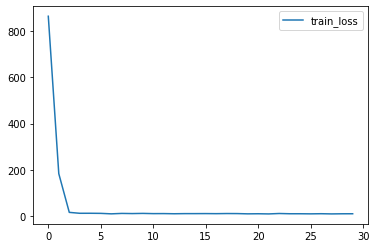

In [78]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

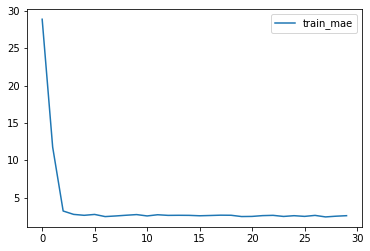

In [79]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'],  label='train_mae')
plt.legend()
plt.show()

In [80]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 47ms/step


In [81]:
y_pred

array([[32.967243],
       [36.87599 ],
       [31.846645],
       [32.967243],
       [36.87599 ],
       [33.075382],
       [32.912846],
       [29.740189],
       [35.681515],
       [34.862675],
       [36.682392],
       [33.17578 ],
       [30.89395 ],
       [31.3858  ],
       [31.285482]], dtype=float32)

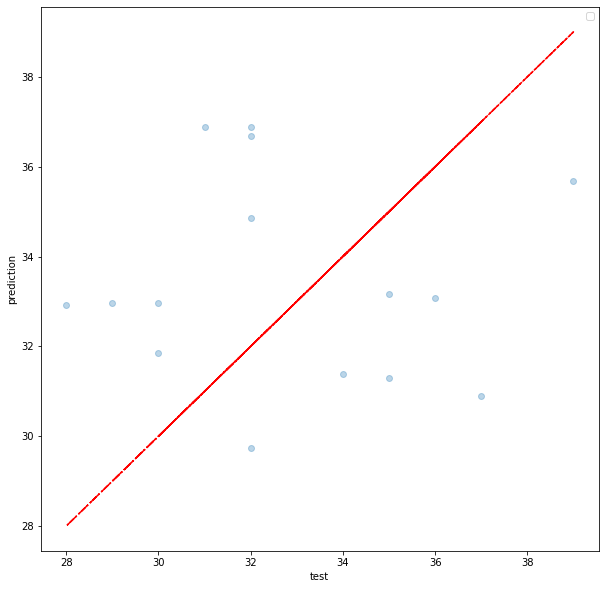

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, alpha=0.3)
plt.plot(y_test,y_test,color='red',linestyle='-.')
plt.xlabel('test')
plt.ylabel('prediction')
plt.legend()
plt.show()

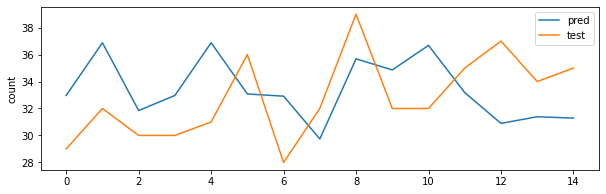

In [94]:
plt.figure(figsize=(10,3))
plt.plot(range(0,15), y_pred, label='pred')
plt.plot(range(0,15),y_test,label='test')
plt.ylabel('count')
plt.legend()
plt.show()

# **선형회귀를 이용한 예측**

In [95]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred=lin_reg.predict(x_test)

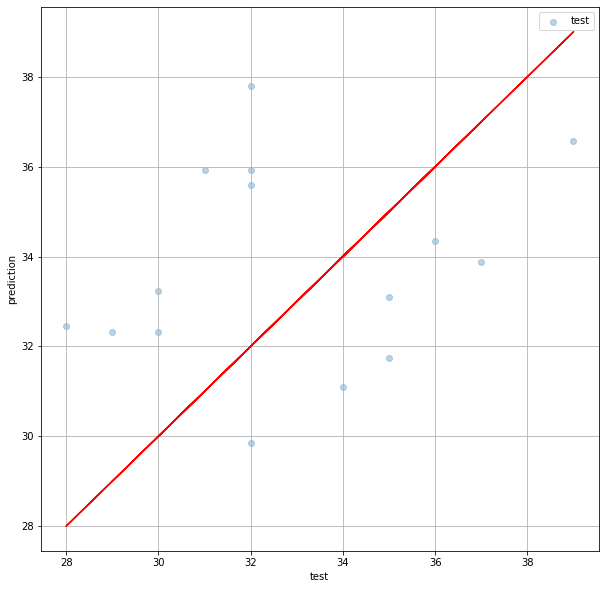

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, alpha=0.3,label='test')
plt.plot(y_test,y_test,color='red')
plt.xlabel('test')
plt.ylabel('prediction')
plt.grid()
plt.legend()
plt.show()

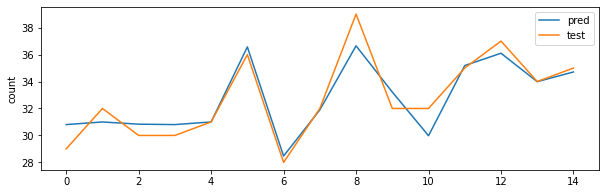

In [100]:
plt.figure(figsize=(10,3))
plt.plot(range(0,15), y_pred, label='pred')
plt.plot(range(0,15),y_test,label='test')
plt.ylabel('count')
plt.legend()
plt.show()

# **결정트리를 활용한 예측**

In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(x_train, y_train)

y_pred=forest_reg.predict(x_test)

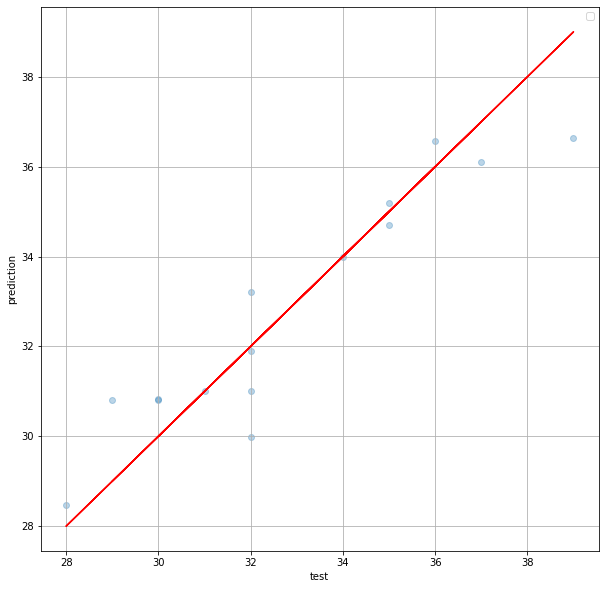

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, alpha=0.3)
plt.plot(y_test,y_test,color='red')
plt.xlabel('test')
plt.ylabel('prediction')
plt.grid()
plt.legend()
plt.show()

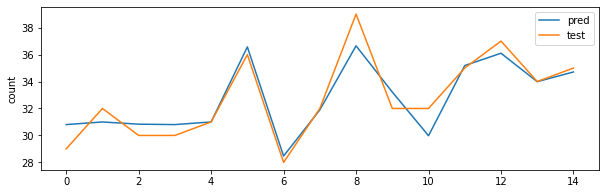

In [99]:
plt.figure(figsize=(10,3))
plt.plot(range(0,15), y_pred, label='pred')
plt.plot(range(0,15),y_test,label='test')
plt.ylabel('count')
plt.legend()
plt.show()